In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import normflows as nf
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from tqdm import tqdm
print(f"Using device: {device}")

Using device: cuda


In [2]:
def sim_revexp_u_mgpd(n, d, a, beta, sig, gamma, MGPD=True, std=False):
    lam = np.exp(beta)
    Y = np.zeros((n, d))
    C = 1 / np.min(lam)
    k = 0

    while k < n:
        U = np.random.uniform(0, 1, d)
        W = (U ** a) / lam
        R = np.random.uniform(0, C)
        Ind = R < np.max(W)
        
        if Ind:
            Y[k, :] = W / R
            k += 1

    if std and not MGPD:
        return np.log(Y)

    X = []
    for j in range(d):
        if gamma[j] != 0:
            X.append(sig[j] * (Y[:, j] ** gamma[j] - 1) / gamma[j])
        else:
            X.append(sig[j] * np.log(Y[:, j]))
    X = np.column_stack(X)

    if MGPD and not std:
        return X
    if std and MGPD:
        return {'X': X, 'Z': np.log(Y)}

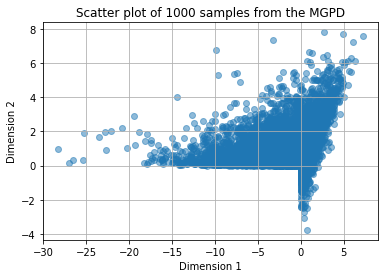

In [38]:
n_samples = 10000
d = 2
a = np.array([3,0.5])
beta = np.array([0, 0])
sig = np.array([1, 1])
gamma = np.array([0, 0])

samples = sim_revexp_u_mgpd(n_samples, d, a, beta, sig, gamma)

# Visualize the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot of 1000 samples from the MGPD')
plt.grid(True)
plt.show()

In [29]:
dim = 2
base = nf.distributions.base.DiagGaussian(2)

num_layers = 16
flows = []
for i in range(num_layers):
    # Neural network with two hidden layers having 64 units each
    # Last layer is initialized by zeros making training more stable
    param_map = nf.nets.MLP([1, 20, 10, 2], init_zeros=True)
    # Add flow layer
    flows.append(nf.flows.AffineCouplingBlock(param_map))
    # Swap dimensions
    flows.append(nf.flows.Permute(2, mode='swap'))
    
f_T_model = nf.NormalizingFlow(base, flows)
f_T_model = f_T_model.to(device)

In [30]:
data = torch.tensor(samples, dtype=torch.float, device = device)

In [31]:
memory = torch.cuda.memory_allocated(device) /10**9
print('{:.2f}G GPU memory allocated'.format(memory))

0.13G GPU memory allocated


Iteration 0, Loss: 2.1633458137512207
Iteration 0 - Learning Rate: 0.0005


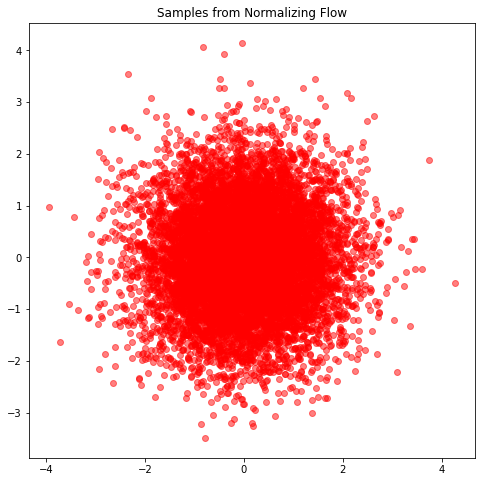

Iteration 1, Loss: 2.0787973403930664
Iteration 1 - Learning Rate: 0.0004999950652140343
Iteration 2, Loss: 2.148651599884033
Iteration 2 - Learning Rate: 0.0004999802610509541
Iteration 3, Loss: 2.015927791595459
Iteration 3 - Learning Rate: 0.0004999555880952023
Iteration 4, Loss: 2.0237386226654053
Iteration 4 - Learning Rate: 0.000499921047320825
Iteration 5, Loss: 2.2200446128845215
Iteration 5 - Learning Rate: 0.0004998766400914329
Iteration 6, Loss: 2.239894390106201
Iteration 6 - Learning Rate: 0.0004998223681601473
Iteration 7, Loss: 2.0565061569213867
Iteration 7 - Learning Rate: 0.0004997582336695312
Iteration 8, Loss: 2.0669939517974854
Iteration 8 - Learning Rate: 0.0004996842391515044
Iteration 9, Loss: 2.083066463470459
Iteration 9 - Learning Rate: 0.0004996003875272438
Iteration 10, Loss: 2.0407354831695557
Iteration 10 - Learning Rate: 0.0004995066821070679
Iteration 11, Loss: 2.1257028579711914
Iteration 11 - Learning Rate: 0.0004994031265903063
Iteration 12, Loss: 2.

Iteration 94, Loss: 1.7815265655517578
Iteration 94 - Learning Rate: 0.00045764897479895266
Iteration 95, Loss: 1.9865224361419678
Iteration 95 - Learning Rate: 0.00045677014356863995
Iteration 96, Loss: 1.8865513801574707
Iteration 96 - Learning Rate: 0.00045588314940710634
Iteration 97, Loss: 2.018939971923828
Iteration 97 - Learning Rate: 0.0004549880273313626
Iteration 98, Loss: 1.8300809860229492
Iteration 98 - Learning Rate: 0.0004540848126792955
Iteration 99, Loss: 1.9146907329559326
Iteration 99 - Learning Rate: 0.00045317354110827295
Iteration 100, Loss: 2.0849366188049316
Iteration 100 - Learning Rate: 0.00045225424859373633
Iteration 101, Loss: 2.074605703353882
Iteration 101 - Learning Rate: 0.0004513269714277799
Iteration 102, Loss: 1.9193377494812012
Iteration 102 - Learning Rate: 0.0004503917462177186
Iteration 103, Loss: 1.9617620706558228
Iteration 103 - Learning Rate: 0.00044944860988464216
Iteration 104, Loss: 1.968031406402588
Iteration 104 - Learning Rate: 0.000448

Iteration 183, Loss: 1.9636380672454834
Iteration 183 - Learning Rate: 0.0003521622686840867
Iteration 184, Loss: 2.006240129470825
Iteration 184 - Learning Rate: 0.0003507266089284151
Iteration 185, Loss: 1.8664945363998413
Iteration 185 - Learning Rate: 0.0003492869726586946
Iteration 186, Loss: 1.9732487201690674
Iteration 186 - Learning Rate: 0.00034784341670930007
Iteration 187, Loss: 1.8010215759277344
Iteration 187 - Learning Rate: 0.0003463959980693485
Iteration 188, Loss: 1.964104175567627
Iteration 188 - Learning Rate: 0.0003449447738804497
Iteration 189, Loss: 1.9450156688690186
Iteration 189 - Learning Rate: 0.0003434898014344495
Iteration 190, Loss: 1.8654279708862305
Iteration 190 - Learning Rate: 0.0003420311381711689
Iteration 191, Loss: 2.0263257026672363
Iteration 191 - Learning Rate: 0.0003405688416761359
Iteration 192, Loss: 1.9849711656570435
Iteration 192 - Learning Rate: 0.00033910296967831207
Iteration 193, Loss: 1.9814623594284058
Iteration 193 - Learning Rate:

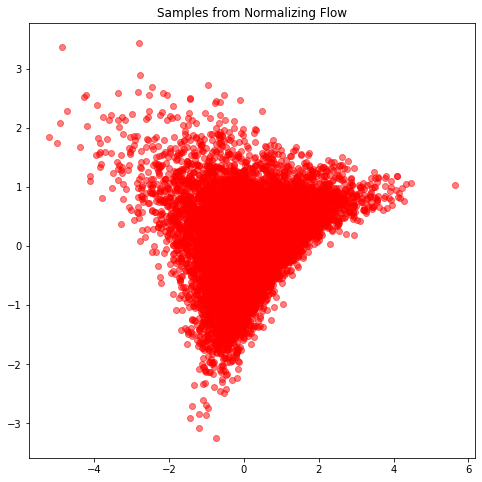

Iteration 201, Loss: 1.9802219867706299
Iteration 201 - Learning Rate: 0.00032575881740819305
Iteration 202, Loss: 1.9562957286834717
Iteration 202 - Learning Rate: 0.00032426039539425823
Iteration 203, Loss: 1.8978416919708252
Iteration 203 - Learning Rate: 0.0003227590417070675
Iteration 204, Loss: 1.8493860960006714
Iteration 204 - Learning Rate: 0.0003212548156174935
Iteration 205, Loss: 1.8108413219451904
Iteration 205 - Learning Rate: 0.0003197477765098068
Iteration 206, Loss: 1.9263979196548462
Iteration 206 - Learning Rate: 0.0003182379838793308
Iteration 207, Loss: 1.8229193687438965
Iteration 207 - Learning Rate: 0.0003167254973300934
Iteration 208, Loss: 1.9225537776947021
Iteration 208 - Learning Rate: 0.0003152103765724737
Iteration 209, Loss: 2.001054525375366
Iteration 209 - Learning Rate: 0.00031369268142084506
Iteration 210, Loss: 2.022796154022217
Iteration 210 - Learning Rate: 0.0003121724717912132
Iteration 211, Loss: 1.902940034866333
Iteration 211 - Learning Rate:

Iteration 292, Loss: 2.0024421215057373
Iteration 292 - Learning Rate: 0.0001847896234275254
Iteration 293, Loss: 1.9353454113006592
Iteration 293 - Learning Rate: 0.0001832745026699058
Iteration 294, Loss: 2.028660297393799
Iteration 294 - Learning Rate: 0.00018176201612066828
Iteration 295, Loss: 1.9067766666412354
Iteration 295 - Learning Rate: 0.00018025222349019228
Iteration 296, Loss: 2.059551239013672
Iteration 296 - Learning Rate: 0.00017874518438250559
Iteration 297, Loss: 1.964101791381836
Iteration 297 - Learning Rate: 0.00017724095829293167
Iteration 298, Loss: 1.755122423171997
Iteration 298 - Learning Rate: 0.00017573960460574089
Iteration 299, Loss: 1.9699081182479858
Iteration 299 - Learning Rate: 0.00017424118259180618
Iteration 300, Loss: 2.022836685180664
Iteration 300 - Learning Rate: 0.0001727457514062628
Iteration 301, Loss: 1.9394029378890991
Iteration 301 - Learning Rate: 0.00017125337008617344
Iteration 302, Loss: 2.0265438556671143
Iteration 302 - Learning Rat

Iteration 382, Loss: 1.911421537399292
Iteration 382 - Learning Rate: 6.562172066045647e-05
Iteration 383, Loss: 1.9885108470916748
Iteration 383 - Learning Rate: 6.456455681531516e-05
Iteration 384, Loss: 2.103635311126709
Iteration 384 - Learning Rate: 6.35147136439544e-05
Iteration 385, Loss: 1.9473686218261719
Iteration 385 - Learning Rate: 6.247223259238503e-05
Iteration 386, Loss: 1.8638256788253784
Iteration 386 - Learning Rate: 6.143715481597397e-05
Iteration 387, Loss: 2.0206351280212402
Iteration 387 - Learning Rate: 6.0409521177819465e-05
Iteration 388, Loss: 2.0969629287719727
Iteration 388 - Learning Rate: 5.938937224713802e-05
Iteration 389, Loss: 1.9181945323944092
Iteration 389 - Learning Rate: 5.8376748297662446e-05
Iteration 390, Loss: 1.9415912628173828
Iteration 390 - Learning Rate: 5.737168930605265e-05
Iteration 391, Loss: 1.970768690109253
Iteration 391 - Learning Rate: 5.6374234950316505e-05
Iteration 392, Loss: 2.053734302520752
Iteration 392 - Learning Rate: 5

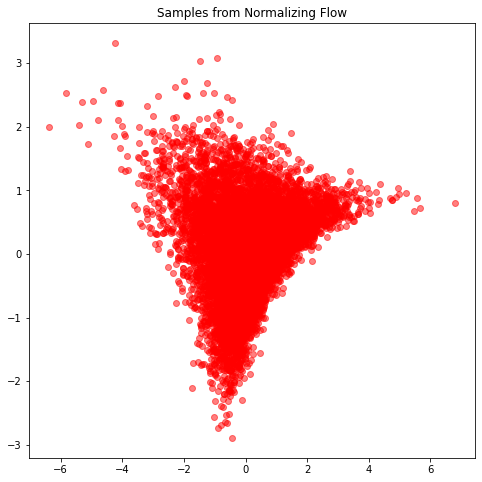

Iteration 401, Loss: 1.9338459968566895
Iteration 401 - Learning Rate: 4.6826458891726446e-05
Iteration 402, Loss: 2.055269479751587
Iteration 402 - Learning Rate: 4.591518732070395e-05
Iteration 403, Loss: 2.0620975494384766
Iteration 403 - Learning Rate: 4.50119726686369e-05
Iteration 404, Loss: 1.9867064952850342
Iteration 404 - Learning Rate: 4.411685059289307e-05
Iteration 405, Loss: 2.0340194702148438
Iteration 405 - Learning Rate: 4.322985643135951e-05
Iteration 406, Loss: 2.1293015480041504
Iteration 406 - Learning Rate: 4.23510252010468e-05
Iteration 407, Loss: 1.8946928977966309
Iteration 407 - Learning Rate: 4.14803915967071e-05
Iteration 408, Loss: 1.9513328075408936
Iteration 408 - Learning Rate: 4.0617989989464525e-05
Iteration 409, Loss: 1.828241229057312
Iteration 409 - Learning Rate: 3.976385442545768e-05
Iteration 410, Loss: 2.0416457653045654
Iteration 410 - Learning Rate: 3.891801862449617e-05
Iteration 411, Loss: 1.7922096252441406
Iteration 411 - Learning Rate: 3.

Iteration 493, Loss: 1.9971600770950317
Iteration 493 - Learning Rate: 2.4176633046882305e-07
Iteration 494, Loss: 2.0149316787719727
Iteration 494 - Learning Rate: 1.776318398526986e-07
Iteration 495, Loss: 1.8386200666427612
Iteration 495 - Learning Rate: 1.2335990856709983e-07
Iteration 496, Loss: 1.8595433235168457
Iteration 496 - Learning Rate: 7.895267917501493e-08
Iteration 497, Loss: 2.040947437286377
Iteration 497 - Learning Rate: 4.441190479775864e-08
Iteration 498, Loss: 1.9903757572174072
Iteration 498 - Learning Rate: 1.973894904597204e-08
Iteration 499, Loss: 1.7749600410461426
Iteration 499 - Learning Rate: 4.934785965721161e-09


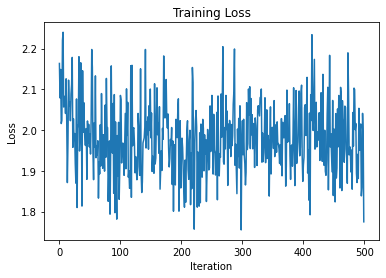

In [32]:
dim = 2
optimizer = torch.optim.Adam(f_T_model.parameters(), lr=5e-4,weight_decay=1e-5)
batch_size = 256
num_iterations = 500
loss_history = []
show_iter = 200

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_iterations)

# Integration settings
s_min = -10.0
s_max = 10.0
num_integration_points = 1000
s_values = torch.linspace(s_min, s_max, num_integration_points, device=device)
s_values = s_values.reshape(-1, 1, 1)

for it in range(num_iterations):
    # Sample a batch of data from h_U
    idx = np.random.choice(data.shape[0], batch_size, replace=False)
    batch_x = data[idx]  # Shape (batch_size, dim)
    
    # Expand batch_x to match s_values
    x_expanded = batch_x.unsqueeze(0)  # Shape (1, effective_batch_size, dim)
    x_expanded = x_expanded.expand(num_integration_points, -1, -1)  # Shape (num_points, effective_batch_size, dim)
    
    # Expand s_values to match batch size and dimension
    s_expanded = s_values.to(batch_x.device)  # Shape (num_points, 1, 1)

    s_expanded = s_expanded.expand(-1, batch_size, 1)  # Shape (num_points, effective_batch_size, 1)

    # Compute x + s for all s_values
    x_plus_s = x_expanded + s_expanded  # Broadcasting over the last dimension
    # x_plus_s shape: (num_points, effective_batch_size, dim)
    x_plus_s = x_plus_s.reshape(-1, dim)  # Flatten to (num_points * effective_batch_size, dim)

    # Compute f_U(x + s)
    log_f_T = f_T_model.log_prob(x_plus_s)  # Shape (num_points * effective_batch_size,)
    
    # Corrected reshaping using the effective batch size
#     f_U_x_s = torch.exp(log_f_U).reshape(num_integration_points, batch_size)  # Shape (num_points, effective_batch_size)
    
    #####################################################################################
#     # Compute the integrand f_U(x + s) * exp(s)
#     exp_s = torch.exp(s_values.squeeze(-1)).to(batch_x.device)  # Shape (num_points, 1)
#     integrand = f_U_x_s * exp_s  # Broadcasting over effective_batch_size
    
#     # Compute the integral using the trapezoidal rule
#     delta_s = (s_max - s_min) / (num_integration_points - 1)
#     integral = torch.trapz(integrand, dx=delta_s, dim=0)  # Shape (effective_batch_size,)
    #######################################################################################
    # log_integrand.shape = (num_points, batch_size)
    # Each element is [log f_U(x+s) + s]
    log_integrand = log_f_T.reshape(num_integration_points, batch_size)
    # We want to numerically approximate log( ∫ exp(log_integrand) ds ).
    # The trapezoid rule in log-space can be approximated by log-sum-exp:

    # 1. log-sum-exp over 'num_points' dimension
    max_vals, _ = torch.max(log_integrand, dim=0, keepdim=True)  # shape (1, batch_size)
    stable_exp = torch.exp(log_integrand - max_vals)             # shape (num_points, batch_size)
    delta_s = (s_max - s_min) / (num_integration_points - 1)
    sum_exp = torch.trapz(stable_exp, dx=delta_s, dim=0)         # shape (batch_size,)
    # 2. Now put the max_vals back in:
    log_integral = max_vals.squeeze(0) + torch.log(sum_exp + 1e-40)  # shape (batch_size,)
#     print(log_integral.shape)
    ########################################################################################

    max_U = torch.max(batch_x, dim=1)[0]
    
    ########################################################################################
#     # Compute h_U(x)
#     h_U_x = (1 / E_exp_max_U) * integral
    
#     # Avoid log of zero
#     h_U_x = torch.clamp(h_U_x, min=1e-12)
#     # Compute the negative log-likelihood loss
#     loss = -torch.log(h_U_x)
    ########################################################################################
    loss = -log_integral + max_U
    
    ########################################################################################


    batch_loss = loss.mean()
    
    # Backpropagation
    optimizer.zero_grad()
    batch_loss.backward()
    
    torch.nn.utils.clip_grad_norm_(f_T_model.parameters(), max_norm=1)
    optimizer.step()
    
    # Record loss
    loss_history.append(batch_loss.item())
    
    if it % 1 == 0:
        print(f"Iteration {it}, Loss: {batch_loss.item()}")
        current_lr = optimizer.param_groups[0]['lr']
    
        print(f"Iteration {it} - Learning Rate: {current_lr}")
        # Debugging: Print shapes
    if it % show_iter == 0:
        
        f_T_model.eval()
        samples_f_T,_ = f_T_model.sample(n_samples)
        f_T_model.train()
        
        plt.figure(figsize=(8,8))
        plt.scatter(samples_f_T[:,0].cpu().data.numpy(), samples_f_T[:,1].cpu().data.numpy(), alpha=0.5, color='red')
        plt.title('Samples from Normalizing Flow')
        plt.show()

    scheduler.step()
    
# Plot the training loss
plt.figure()
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

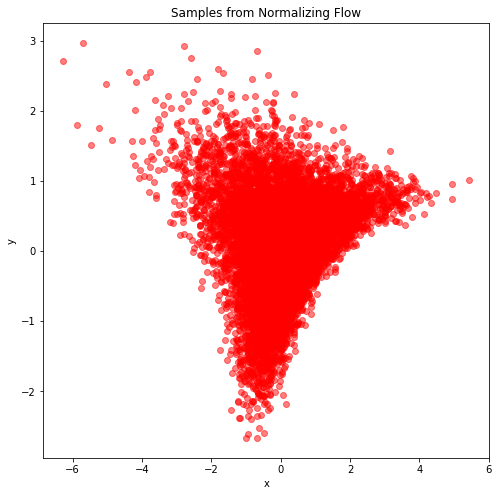

In [33]:
f_T_model.eval()
samples_f_T,_ = f_T_model.sample(n_samples)
f_T_model.train()


# Plot the samples from the flow
plt.figure(figsize=(8,8))
plt.scatter(samples_f_T[:,0].cpu().data.numpy(), samples_f_T[:,1].cpu().data.numpy(), alpha=0.5, color='red')
plt.title('Samples from Normalizing Flow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
T = samples_f_T
T_max = torch.max(samples_f_T,axis=1,keepdim=True)[0]
T1 = T-T_max
E = torch.empty(n_samples,device=device)
E = E.exponential_(1.0).unsqueeze(1)
Pred = E + T1


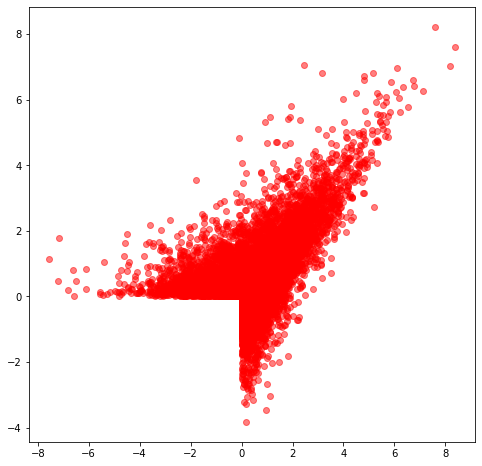

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(Pred[:,0].cpu().data.numpy(), Pred[:,1].cpu().data.numpy(), alpha=0.5, color='red')

/tmp/ipykernel_3884149/3070704746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples[:,0], hist=False, kde=True,
/tmp/ipykernel_3884149/3070704746.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Pred[:,0].cpu().data.numpy(), hist=False, kde=True,
/tmp/ipykernel_388

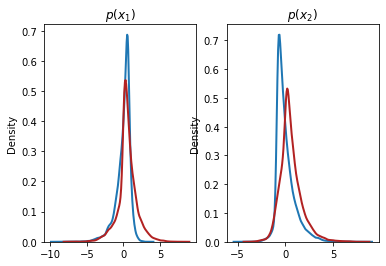

In [36]:
plt.subplot(1, 2, 1)
sns.distplot(samples[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(Pred[:,0].cpu().data.numpy(), hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(samples[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(Pred[:,1].cpu().data.numpy(), hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_2)$')
plt.show()

/tmp/ipykernel_3568877/2863656582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples[:,1], hist=False, kde=True,


<Axes: ylabel='Density'>

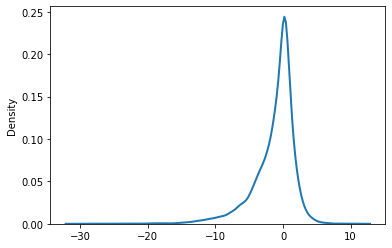

In [21]:
sns.distplot(samples[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')

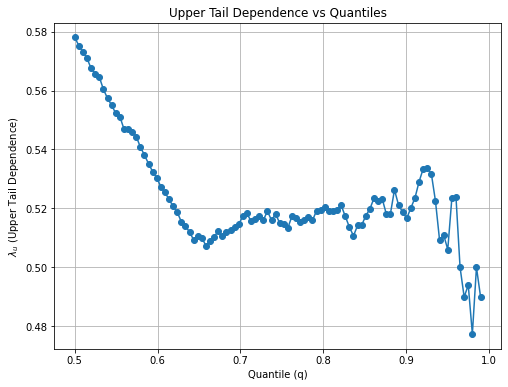

Empirical upper tail dependence: 0.49


In [19]:
def empirical_upper_tail_dependence(X1, X2, q):
    """
    Calculate empirical upper tail dependence coefficient.

    Parameters:
    X1, X2 : numpy arrays
        Samples from two random variables.
    q : float
        Quantile threshold (close to 1, e.g., 0.95 or 0.99).

    Returns:
    lambda_u : float
        Empirical upper tail dependence coefficient.
    """
    # Compute the quantiles
    F1_q = np.quantile(X1, q)
    F2_q = np.quantile(X2, q)
    
    # Count joint exceedances
    joint_exceedance = np.sum((X1 > F1_q) & (X2 > F2_q))
    exceedance_X1 = np.sum(X1 > F1_q)
    
    # Calculate lambda_u
    if exceedance_X1 == 0:  # Avoid division by zero
        return 0.0
    lambda_u = joint_exceedance / exceedance_X1
    return lambda_u


def plot_tail_dependence(X1, X2, quantiles):
    """
    Plot upper tail dependence vs quantiles.

    Parameters:
    X1, X2 : numpy arrays
        Samples from two random variables.
    quantiles : list or array
        List of quantiles to evaluate (e.g., np.linspace(0.9, 0.99, 50)).
    """
    # Compute lambda_u for each quantile
    lambda_values = [empirical_upper_tail_dependence(X1, X2, q) for q in quantiles]
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(quantiles, lambda_values, marker='o', linestyle='-')
    plt.xlabel('Quantile (q)')
    plt.ylabel(r'$\lambda_u$ (Upper Tail Dependence)')
    plt.title('Upper Tail Dependence vs Quantiles')
    plt.grid(True)
    plt.show()

# Example usage
np.random.seed(42)
X1 = samples[:,0]
X2 = samples[:,1]

# Define quantiles (e.g., from 0.90 to 0.99)
quantiles = np.linspace(0.50, 0.990, 100)

# Plot the tail dependence
plot_tail_dependence(X1, X2, quantiles)
# Compute lambda_u at 0.95 quantile
q = 0.99
lambda_u = empirical_upper_tail_dependence(X1, X2, q)
print(f"Empirical upper tail dependence: {lambda_u}")

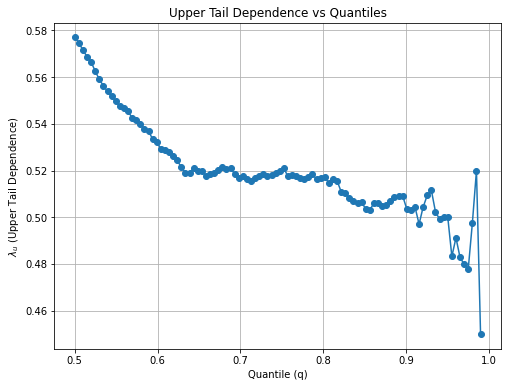

Empirical upper tail dependence: 0.45


In [39]:
X1 = Pred[:,0].cpu().data.numpy()
X2 = Pred[:,1].cpu().data.numpy()

# Define quantiles (e.g., from 0.90 to 0.99)
quantiles = np.linspace(0.50, 0.990, 100)

# Plot the tail dependence
plot_tail_dependence(X1, X2, quantiles)
# Compute lambda_u at 0.95 quantile
q = 0.99
lambda_u = empirical_upper_tail_dependence(X1, X2, q)
print(f"Empirical upper tail dependence: {lambda_u}")